In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
after_trip = pd.read_excel("data/코로나이후_국내힐링여행.xlsx")

In [3]:
after_trip.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/is6867?Redirect=Log&log...,2020.09.26.,국내 섬 여행 추도 대피늘 적당한 트래킹 통영힐링여행,"['#국내섬여행', '#통영서호시장', '#서호시장', '#섬여행', '#추도', ...",['\n\n\n\n\u200b\u200b새벽부터 이동해 도착한추도\u200b\n\n...
1,https://withbeatles.tistory.com/1510,2020.06.05.,"국내 힐링여행 추천... 경기도박물관, 안성 서일농원 여행코스",[],[]
2,https://blog.naver.com/revress?Redirect=Log&lo...,2020.06.15.,국내 힐링여행 모든 곳이 아름다운 제주,"['#국내여행', '#국내힐링여행', '#제주여행', '#국내여행지추천']",['\n\n\n\n안녕하세요 문어숙회입니다 :)\u200b이번 4월 봄에 1박2일로...
3,https://blog.naver.com/kunby?Redirect=Log&logN...,2020.07.16.,국내힐링여행 양평1박2일 골프전지훈련과 승마클럽,"['#국내힐링여행', '#양평1박2일', '#골프전지훈련', '#승마클럽']",['\n\n\n\n오랫만에 가족들과 양평1박2일 여행을 다녀왔습니다.이곳 미리내리조...
4,https://blog.naver.com/mttour?Redirect=Log&log...,2020.08.19.,[국내 힐링 여행] 전북 언택트 힐링여행 1편,"['#언택트여행', '#완주', '#고창', '#익산', '#아원고택', '#BTS...",['\n\n\n\n\u200b안녕하세요명상여행 가이드 도나예요 :) \u200b\n...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
after_trip["hashtags"] = after_trip["hashtags"].apply(ast.literal_eval)
after_trip["contents"] = after_trip["contents"].apply(ast.literal_eval)

In [5]:
after_trip = after_trip[(after_trip["hashtags"].str.len() != 0) | (after_trip["contents"].str.len() != 0)]

In [6]:
len(after_trip)

1945

- hashtags랑 contents 데이터 합치기

In [7]:
after_trip["info"] = after_trip["hashtags"] + after_trip["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [8]:
after_trip["info"] = after_trip["info"].map(lambda x: ' '.join(x))

In [9]:
after_trip["info"] = after_trip["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [10]:
okt = Okt()
after_trip["info"] = after_trip["info"].map(lambda x: okt.nouns(x))

In [11]:
after_trip["info"]

0       [국내, 섬, 여행, 통영, 서호, 시장, 서호, 시장, 섬, 여행, 추도, 국내,...
2       [국내, 여행, 국내힐링여행, 제주, 여행, 국내여행지, 추천, 문어, 숙회, 이번...
3       [국내힐링여행, 양평, 박, 골프, 훈련, 승마, 클럽, 만, 가족, 양평, 박, ...
4       [택트, 여행, 완주, 고창, 익산, 고택, 성지, 송광사, 옥, 마을, 전북, 택...
5       [국내, 여름, 휴가, 파주, 글램핑, 힐링여행, 파주, 동화, 힐링캠프, 정말, ...
                              ...                        
1995    [청산도, 여행, 청산, 도배, 편, 청산도, 섬, 나, 청산도, 돌담, 마을, 청...
1996    [국내, 호텔, 호텔, 할인, 호텔, 핫딜, 호텔특, 베어스, 타운, 리조트, 포천...
1997    [제주, 유채꽃, 유채꽃, 명소, 함덕, 서우, 봉, 산방산, 유채꽃, 서우, 봉,...
1998    [태안, 숙소, 안면도, 숙소, 태안, 펜션, 안면도, 펜션, 꽃지, 해수욕장, 펜...
1999    [포천, 산정호수, 산정호수, 펜션, 늘, 선비, 님, 주말, 휴식, 위, 박, 포...
Name: info, Length: 1945, dtype: object

# WordCloud

In [12]:
word_tokens = list(after_trip["info"])
word_tokens = sum(word_tokens, [])

In [13]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [14]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

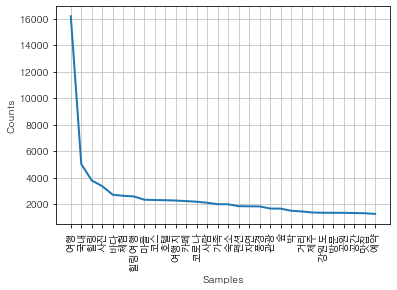

In [15]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

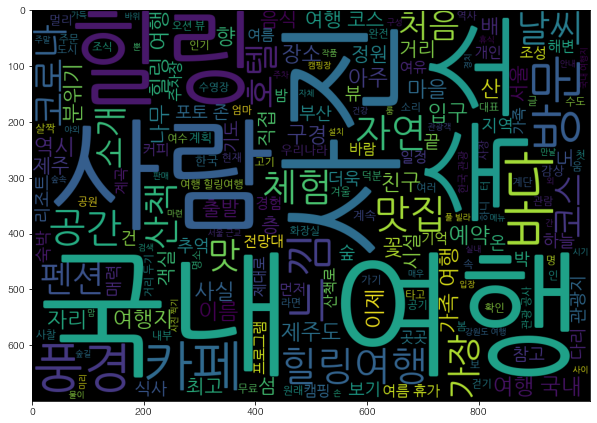

In [16]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('국내힐링여행_코로나후.png')

# LDA

In [24]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

In [25]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = after_trip["info"].apply(lambda x: korean_stop_words(x, stop_words))

dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(data) for data in dataset]

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [27]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 1;
    step = 5;
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

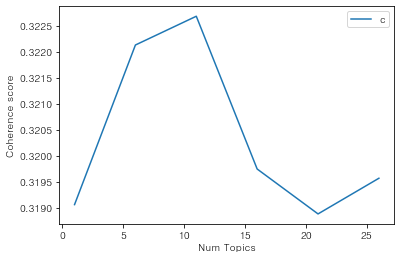

In [28]:
find_optimal_number_of_topics(dictionary, corpus, dataset)

In [29]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=11, passes=30)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.025*"여행" + 0.012*"섬" + 0.009*"국내" + 0.008*"숲" + 0.008*"여행지"')
(1, '0.031*"마을" + 0.021*"체험" + 0.019*"여행" + 0.009*"옥" + 0.008*"농촌"')
(2, '0.015*"여행" + 0.010*"제천" + 0.010*"속초" + 0.009*"충주" + 0.007*"마을"')
(3, '0.020*"여행" + 0.010*"평창" + 0.009*"강원도" + 0.008*"청도" + 0.007*"국내"')
(4, '0.024*"여행" + 0.016*"온천" + 0.012*"녹차" + 0.009*"보성" + 0.009*"청송"')
(5, '0.025*"호텔" + 0.015*"여행" + 0.013*"제주" + 0.013*"제주도" + 0.011*"리조트"')
(6, '0.033*"여행" + 0.016*"부산" + 0.010*"국내" + 0.010*"경주" + 0.007*"바다"')
(7, '0.020*"여행" + 0.010*"숲" + 0.008*"숲길" + 0.007*"코스" + 0.006*"국내"')
(8, '0.047*"여행" + 0.016*"관광" + 0.014*"코로나" + 0.011*"국내" + 0.008*"치유"')
(9, '0.038*"여행" + 0.017*"펜션" + 0.013*"숙소" + 0.011*"사진" + 0.011*"카페"')
(10, '0.017*"여행" + 0.017*"정선" + 0.012*"거제" + 0.011*"하동" + 0.008*"고창"')


In [30]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (c_v): ', coherence_lda)

Coherence Score (c_v):  0.34893096884878827


In [31]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)


Coherence Score (u_mass):  -2.2878990989084254


In [32]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
                
    return(topic_table)

In [33]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,4.0,0.5996,"[(0, 0.13921489), (1, 0.05043303), (4, 0.59958..."
1,1,5.0,0.6174,"[(0, 0.095592074), (5, 0.6173694), (9, 0.283713)]"
2,2,5.0,0.7936,"[(5, 0.79359066), (9, 0.11347853), (10, 0.0897..."
3,3,1.0,0.5430,"[(0, 0.10867155), (1, 0.54300153), (3, 0.23299..."
4,4,9.0,0.9236,"[(7, 0.07350354), (9, 0.9236423)]"
...,...,...,...,...
1940,1940,0.0,0.5164,"[(0, 0.5163739), (5, 0.12020192), (9, 0.3604474)]"
1941,1941,5.0,0.9414,"[(0, 0.014658534), (3, 0.042136602), (5, 0.941..."
1942,1942,5.0,0.5134,"[(0, 0.30458814), (4, 0.18014711), (5, 0.51335..."
1943,1943,9.0,0.9983,"[(9, 0.99833965)]"


In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)